**Proximal Policy Optimization on the modified GridWorld Environment**  
Run various experiments using different hyperparams

In [128]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as T
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from torch.distributions import Categorical

In [2]:
from quarry2 import *
from Task3_utils import *

In [4]:
# networks were trained using camber gpus 
device = torch.device('cpu')
if torch.cuda.is_available():
   device = torch.device('cuda')
print(device)

cuda


In [3]:
env=Quarry2(10)
env.reset() # show that the environment now prints out a range of new state as the state, not just the location

{'relative_coordinates': array([0, 0], dtype=int64),
 'resource_load': 0,
 'resource_target_remaining': 25,
 'surroundings': array([[0, 0, 1, 1, 1],
        [0, 1, 0, 1, 1],
        [0, 0, 4, 1, 1],
        [0, 0, 1, 1, 1],
        [0, 0, 2, 1, 1]], dtype=int8)}

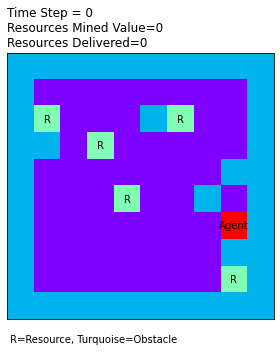

In [4]:
env.show_env()

In [5]:
env.step('left') # step function also reproduces extended data

({'relative_coordinates': array([0, 1], dtype=int64),
  'resource_load': 0,
  'resource_target_remaining': 25,
  'surroundings': array([[0, 0, 0, 1, 1],
         [0, 0, 1, 0, 1],
         [0, 0, 4, 3, 1],
         [0, 0, 0, 1, 1],
         [0, 0, 0, 2, 1]], dtype=int8)},
 -1,
 False)

In [28]:
# set params  - NB this is just one example experiment below - many others were carried out to deliver the report findings
n_epochs=20
eps = 0.1 # higher epsilon is more exploration 
gamma = 0.97   # set discount factor
hidden_size = 32 # hidden size of policy net
c_hidden_size=8 # hidden size of critic net
policy_lr = 0.0001 # learning rate
value_lr = 0.0001
SIZE_ENVIR = 100 
max_len_episode = SIZE_ENVIR*2
clip_factor = 20 #reward clipping factor
n_trajectories = SIZE_ENVIR # number of trajectories to use in training

In [29]:
#create env and networks
env = Quarry2(SIZE_ENVIR)
env.reset()
critic_net = CriticNet(29, c_hidden_size, 1).to(device).train()
policy_net = PolicyNet(29, hidden_size, 4).to(device).train()
critic_optimizer = optim.Adam(critic_net.parameters(), policy_lr) 
policy_optimizer = optim.Adam(policy_net.parameters(), value_lr) 

In [30]:
#run experiments
mean_rewards_hist =[]
mean_n_steps_hist = []
mean_base_visits_hist=[]
p_loss_hist=[]
v_loss_hist=[]
for e in range(n_epochs):
    p_loss, v_loss, mean_rewards, mean_n_steps, mean_base_visits = PPO_step(env, critic_net, critic_optimizer, policy_net, policy_optimizer, clip_factor, gamma, eps, n_trajectories, max_len_episode)
    mean_rewards_hist.append(mean_rewards)
    mean_n_steps_hist.append(mean_n_steps)
    mean_base_visits_hist.append(mean_base_visits)
    p_loss_hist.append(p_loss)
    v_loss_hist.append(v_loss)
    print('e',e, 'p_loss = ', p_loss, 'v_loss = ', v_loss, 'mean_rewards=', mean_rewards, 'mean_n_steps=', mean_n_steps, 'mean base visits=', mean_base_visits ) 

e 0 p_loss =  143.90180458068846 v_loss =  22504.33484375 mean_rewards= -4.801500000000001 mean_n_steps= 200.0 mean base visits= 0.0
e 1 p_loss =  116.69652717590333 v_loss =  15498.744189453126 mean_rewards= -4.0035 mean_n_steps= 200.0 mean base visits= 0.0
e 2 p_loss =  102.46048500061035 v_loss =  12233.143955078125 mean_rewards= -3.572250000000001 mean_n_steps= 200.0 mean base visits= 0.0
e 3 p_loss =  78.00347929000854 v_loss =  7600.152420043945 mean_rewards= -2.82 mean_n_steps= 200.0 mean base visits= 0.0
e 4 p_loss =  70.72673501968384 v_loss =  6379.958046875 mean_rewards= -2.6357500000000003 mean_n_steps= 200.0 mean base visits= 0.0
e 5 p_loss =  52.27667491912842 v_loss =  3978.984565124512 mean_rewards= -2.1014999999999997 mean_n_steps= 200.0 mean base visits= 0.0
e 6 p_loss =  48.928918266296385 v_loss =  3544.935315856934 mean_rewards= -2.0395 mean_n_steps= 200.0 mean base visits= 0.0
e 7 p_loss =  37.25490136146546 v_loss =  2223.361513366699 mean_rewards= -1.72675000000

Text(0.0, 1.0, 'PPO is capable of better learning on larger/ more complex\n environments compared to tabular methods (here N=100)\n')

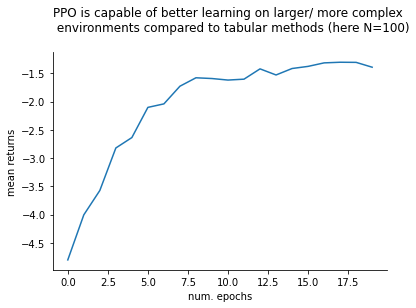

In [43]:
#plot results
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.plot(mean_rewards_hist)
plt.xlabel('num. epochs')
plt.ylabel('mean returns')
plt.title('PPO is capable of better learning on larger/ more complex\n environments compared to tabular methods (here N=100)\n', loc='left')

Text(0.0, 1.0, 'Unsuprisingly the value loss is close to the\ninverse of the reward increase ( N=100)\n')

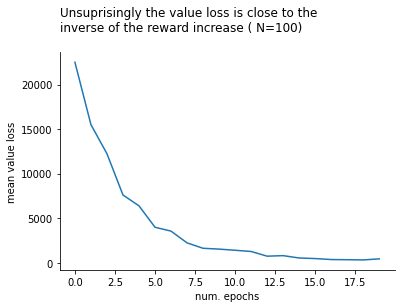

In [48]:
plt.plot(v_loss_hist)
plt.xlabel('num. epochs')
plt.ylabel('mean value loss')
plt.title('Unsuprisingly the value loss is close to the\ninverse of the reward increase ( N=100)\n', loc='left')

**Below are plots from various experiments that were ran**

Text(0.0, 1.0, 'An learning rate of 0.0001 was best (N=50)\n')

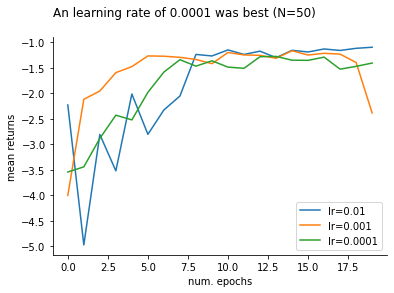

In [120]:
plt.plot(lr01, label='lr=0.01')
plt.plot(lr001, label='lr=0.001')
plt.plot(lr0001, label='lr=0.0001')
plt.legend()
plt.legend()
plt.xlabel('num. epochs')
plt.ylabel('mean returns')
plt.title('An learning rate of 0.0001 was best (N=50)\n', loc='left')

Text(0.0, 1.0, 'An reward clip factor of 20 gave the smoothest learning (N=50)\n')

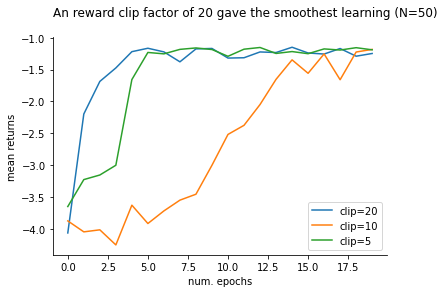

In [105]:
plt.plot(clip20, label='clip=20')
plt.plot(clip10, label='clip=10')
plt.plot(clip5, label='clip=5')
plt.legend()
plt.legend()
plt.xlabel('num. epochs')
plt.ylabel('mean returns')
plt.title('An reward clip factor of 20 gave the smoothest learning (N=50)\n', loc='left')

Text(0.0, 1.0, 'An epsilon of 0.3 gave the smoothest learning but other \nvalues converged to the same maximum (N=50)\n')

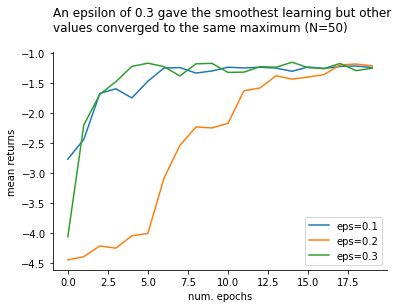

In [74]:
#plot results
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.plot(ep1, label='eps=0.1')
plt.plot(ep2, label='eps=0.2')
plt.plot(ep3, label='eps=0.3')
plt.legend()
plt.xlabel('num. epochs')
plt.ylabel('mean returns')
plt.title('An epsilon of 0.3 gave the smoothest learning but other \nvalues converged to the same maximum (N=50)\n', loc='left')

Text(0.0, 1.0, 'An gamma of 0.97 gave the smoothest learning (N=50)\n')

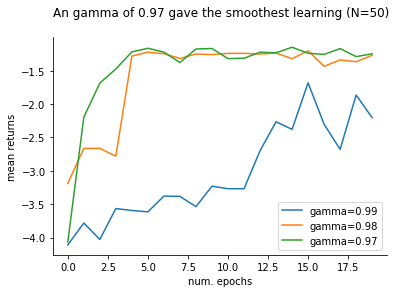

In [94]:
plt.plot(gamma99, label='gamma=0.99')
plt.plot(gamma98, label='gamma=0.98')
plt.plot(gamma97, label='gamma=0.97')
plt.legend()
plt.legend()
plt.xlabel('num. epochs')
plt.ylabel('mean returns')
plt.title('An gamma of 0.97 gave the smoothest learning (N=50)\n', loc='left')